In [2]:
import pandas as pd
import numpy as np


In [3]:
feature=pd.read_csv(r"C:\Users\Sanket\Downloads\archive\Mall_Customers.csv")

In [4]:
feature

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
main=feature.iloc[:,3:]
main

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [7]:
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit_predict(main)
    sse.append(km.inertia_)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

In [8]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30259.65720728547,
 25011.839349156595,
 21818.114588452183,
 19649.596582866965]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'SSE')

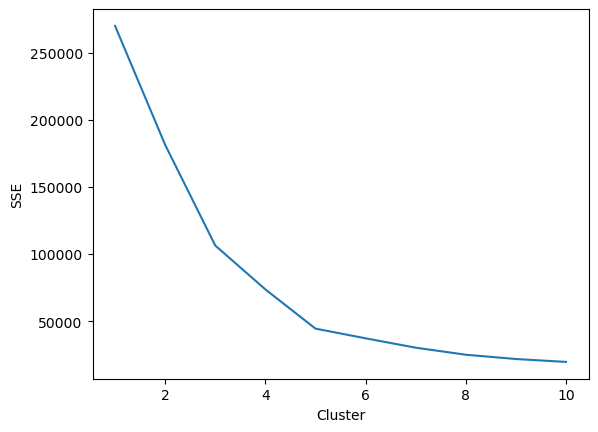

In [10]:
plt.plot(range(1,11),sse)
plt.xlabel("Cluster")
plt.ylabel("SSE")

In [11]:
km=KMeans(n_clusters=5,random_state=42)
labels=km.fit_predict(main)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
cent=km.cluster_centers_
cent

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [13]:
agl=AgglomerativeClustering(n_clusters=5)


In [14]:
label2=agl.fit_predict(main)

<Axes: title={'center': 'KMeans'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

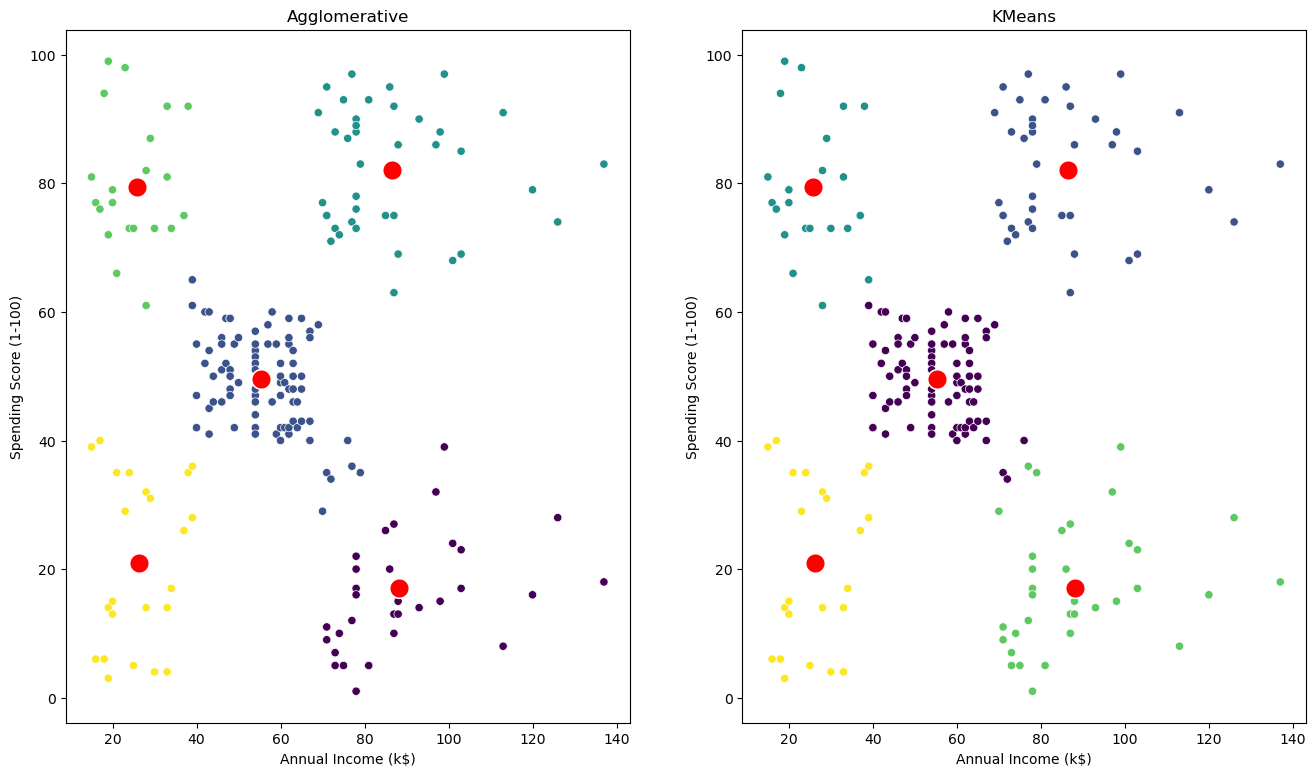

In [15]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Agglomerative")
sns.scatterplot(x=main["Annual Income (k$)"],y=main["Spending Score (1-100)"],c=label2)
sns.scatterplot(x=cent[:,0],y=cent[:,1],s=200,color="red")

plt.subplot(1,2,2)
plt.title("KMeans")
sns.scatterplot(x=main["Annual Income (k$)"],y=main["Spending Score (1-100)"],c=labels)
sns.scatterplot(x=cent[:,0],y=cent[:,1],s=200,color="red")
